In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [3]:
data1= pd.read_csv('DataFilter1.csv', low_memory= False)
data2= pd.read_csv('DataFilter2.csv', low_memory= False)
data= pd.concat([data1, data2], ignore_index=False)

In [4]:
data.head()

,index,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,director,release_year,return
0,0,Toy Story Collection,30000000,"Animation, Comedy, Family",862.0,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,...,English,Released,NaN,Toy Story,7.7,5415.0,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",John Lasseter,1995,12.451801
1,1,NaN,65000000,"Adventure, Fantasy, Family",8844.0,en,When siblings Judy and Peter discover an encha...,17.015539,"TriStar Pictures, Teitler Film, Interscope Com...",United States of America,...,English,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",Joe Johnston,1995,4.043035
2,2,Grumpy Old Men Collection,0,"Romance, Comedy",15602.0,en,A family wedding reignites the ancient feud be...,11.712900,"Warner Bros., Lancaster Gate",United States of America,...,English,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...",Howard Deutch,1995,NaN
3,3,NaN,16000000,"Comedy, Drama, Romance",31357.0,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,Twentieth Century Fox Film Corporation,United States of America,...,English,Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,"Whitney Houston, Angela Bassett, Loretta Devin...",Forest Whitaker,1995,5.090760
4,4,Father of the Bride Collection,0,Comedy,11862.0,en,Just when George Banks has recovered from his ...,8.387519,"Sandollar Productions, Touchstone Pictures",United States of America,...,English,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,"Steve Martin, Diane Keaton, Martin Short, Kimb...",Charles Shyer,1995,inf


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45451 entries, 0 to 45450
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  45451 non-null  int64  
 1   belongs_to_collection  4497 non-null   object 
 2   budget                 45451 non-null  int64  
 3   genres                 43067 non-null  object 
 4   id                     45451 non-null  float64
 5   original_language      45440 non-null  object 
 6   overview               44505 non-null  object 
 7   popularity             45451 non-null  float64
 8   production_companies   33634 non-null  object 
 9   production_countries   39232 non-null  object 
 10  release_date           45451 non-null  object 
 11  revenue                45451 non-null  float64
 12  runtime                45205 non-null  float64
 13  spoken_languages       41456 non-null  object 
 14  status                 45371 non-null  object 
 15  ta

# Datos Nulos

In [6]:
DNull = data.isnull().sum().to_frame().sort_values(by=[0], ascending=False)
DNull.rename(columns={0: "total_nulos"}, inplace = True)
DNull["%_nulos"] =round(data.apply(lambda x: 1-(x.count()/x.size))*100,2)
DNull

,total_nulos,%_nulos
belongs_to_collection,40954,90.11
return,34509,75.93
tagline,25027,55.06
production_companies,11817,26.00
production_countries,6219,13.68
spoken_languages,3995,8.79
genres,2384,5.25
cast,2354,5.18
director,1007,2.22
overview,946,2.08


En la tabla anterior, se puede observar que las columnas 'belongs_to_collection' y 'return' presentan los mayores porcentajes de datos nulos. Es interesante destacar que esta última llama la atención debido a que las columnas a partir de las cuales se creó ('budget' y 'revenue') no contienen datos faltantes, lo que sugiere que estos datos podrían tener un valor de cero. Dado que el cálculo para 'return' se realiza mediante la fórmula $\frac{revenue}{budget}$, los valores nulos en esta variable serán interpretados como 'budget' con un valor de cero.

# Resumen estadístico

In [11]:
data.describe()

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count,release_year,return
count,45451.000000,4.545100e+04,45451.000000,45451.000000,4.545100e+04,45205.000000,45451.000000,45451.000000,45451.000000,1.094200e+04
mean,22751.365977,4.231294e+06,107984.599745,2.926887,1.121930e+07,94.181905,5.624085,109.989703,1991.882027,inf
std,13142.296884,1.742942e+07,112111.336735,6.006458,6.433984e+07,38.329504,1.915424,491.352336,24.057726,NaN
min,0.000000,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1874.000000,0.000000e+00
25%,11367.500000,0.000000e+00,26367.500000,0.389095,0.000000e+00,85.000000,5.000000,3.000000,1978.000000,0.000000e+00
50%,22750.000000,0.000000e+00,59871.000000,1.131386,0.000000e+00,95.000000,6.000000,10.000000,2001.000000,1.273533e+00
75%,34126.500000,0.000000e+00,156327.500000,3.694370,0.000000e+00,107.000000,6.800000,34.000000,2010.000000,7.268590e+00
max,45537.000000,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000,inf


En general, todas las variables numéricas muestran una alta dispersión. Al comparar la media con la mediana o el percentil 50 (Q50), se observa una marcada diferencia entre estas medidas, lo que sugiere la presencia de datos extremos o atípicos. Esto se refleja en los valores de la desviación estándar (std) y en los valores máximos y mínimos de las variables.

In [12]:
data.describe(include=object)

,belongs_to_collection,genres,original_language,overview,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,cast,director
count,4497,43067,45440,44505,33634,39232,45451,41456,45371,20424,45451,43097,44444
unique,1695,4064,89,44230,22666,2388,17333,72,6,20268,42195,42656,17465
top,The Bowery Boys,Drama,en,No overview found.,Metro-Goldwyn-Mayer (MGM),United States of America,2008-01-01,English,Released,Which one is the first to return - memory or t...,Blackout,Georges Méliès,John Ford
freq,29,5006,32249,133,742,17868,136,26861,45009,9,13,24,66


Según la anterior tabla es comun las peliculas producidas en EE.UU de drama en idioma ingles.

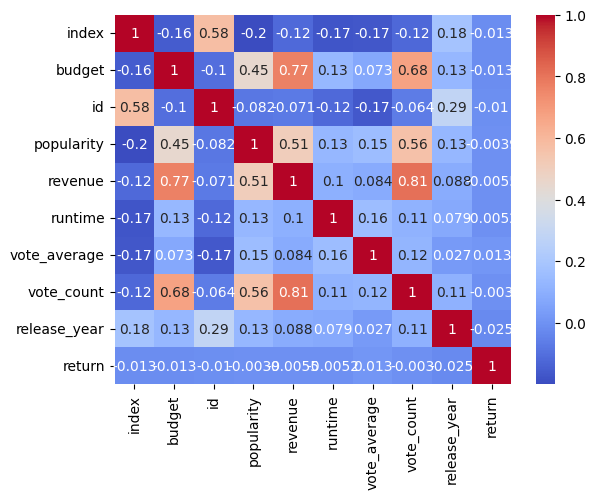

In [14]:
DataNum = data.select_dtypes(include='number')
correlation_matrix = DataNum.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.show()


En el gráfico anterior, se muestra la correlación lineal entre las variables numéricas. Se puede observar una fuerte correlación entre las variables 'budget' y 'revenue', lo cual indica que a medida que aumenta el presupuesto, también aumenta la recaudación en la película. Del mismo modo, se observa un aumento en los votos recibidos en TMDB cuando se incrementa tanto el presupuesto como los ingresos ('budget' y 'revenue', respectivamente). Esto sugiere que las películas con mayor financiamiento tienden a recibir una mejor calificación por parte de los usuarios y, como resultado, generan una mayor recaudación.

# Análisis de títulos

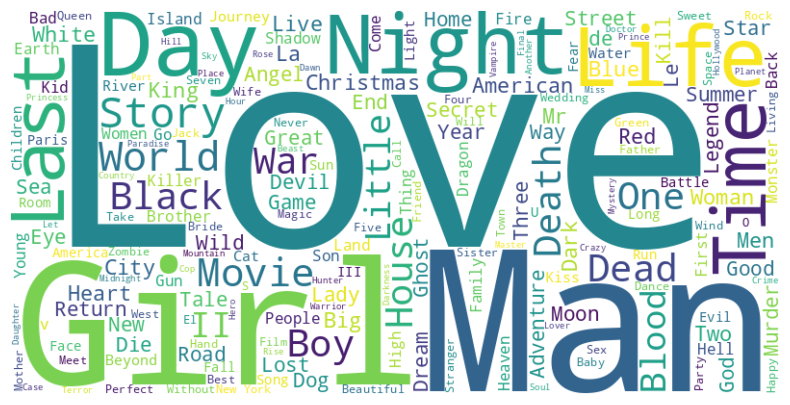

In [15]:
textos = ' '.join(data['title'].tolist())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(textos)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Según la nube de palabras mostrada en la imagen anterior, es común encontrar títulos de películas relacionados con el amor (Love), el hombre (Man) y la mujer (Girl). En menor medida, las películas también están relacionadas con el día (day), el tiempo (time), la vida (life) y la noche (night). Esto sugiere, según el gráfico de correlación, que las películas que reciben mayor financiamiento, obtienen mejores votos y generan mayores recaudaciones son aquellas que tratan sobre el amor entre hombres y mujeres, así como aspectos relacionados con el tiempo y la vida.